# CNN - CIFAR

In [16]:
from tensorflow.keras.datasets import cifar10
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import regularizers, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
(X_train, labels_train), (X_test, labels_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
X_train = X_train[:100]
labels_train = labels_train[:100]
reduction_factor = 10

idx_train = np.random.choice(len(X_train), round(len(X_train)/reduction_factor))
idx_test = np.random.choice(len(X_test), round(len(X_test)/reduction_factor))

X_train_small = X_train[idx_train]
X_test_small = X_test[idx_test]
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

print(X_train_small.shape, X_test_small.shape)
unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts)) 

(10, 32, 32, 3) (1000, 32, 32, 3)


{0: 1, 1: 1, 2: 1, 3: 3, 5: 2, 7: 2}

In [6]:
X_train = X_train/255
X_test = X_test/255

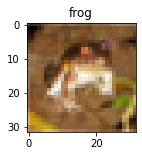

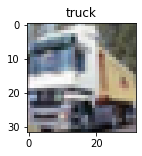

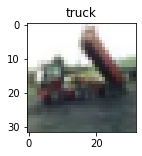

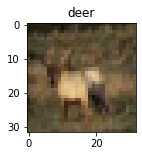

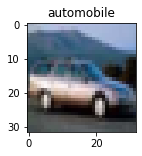

In [8]:
for i in range(5):
    img = X_train[i]
    label = labels_train[i][0]
    
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.title(labels[label])
    plt.show()

## Categorical label

In [10]:
y_train = to_categorical(labels_train, num_classes=10)
y_test = to_categorical(labels_test, num_classes=10)

## CNN

In [12]:
X_train.shape

(5000, 32, 32, 3)

In [12]:
def initialize_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128, (3,3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.Flatten())

    model.add(layers.Dense(120, activation='relu')) # intermediate layer
    model.add(layers.Dense(60, activation='relu')) # intermediate layer
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation='softmax'))
   
    return model

In [13]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [17]:
def compile_model(model):
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

❓ **Question** ❓ Compile your model and fit it on your training data, with an early stopping (patience to 5 to keep fast computations).

Store the output of the fit in an `history` variable.

In [18]:
model = initialize_model()

model = compile_model(model)

es = EarlyStopping(patience=5)

history = model.fit(X_train, y_train,
              epochs=22,
              batch_size=32, 
              verbose=1,
              callbacks=[es],
              validation_data=(X_test, y_test))

Epoch 1/22
4/4 [==============================] - 2s 564ms/step - loss: 2.2983 - accuracy: 0.0800 - val_loss: 2.3032 - val_accuracy: 0.1231
Epoch 2/22
4/4 [==============================] - 1s 467ms/step - loss: 2.2909 - accuracy: 0.1200 - val_loss: 2.3107 - val_accuracy: 0.1000
Epoch 3/22
4/4 [==============================] - 1s 468ms/step - loss: 2.2520 - accuracy: 0.1500 - val_loss: 2.3130 - val_accuracy: 0.1000
Epoch 4/22
4/4 [==============================] - 1s 456ms/step - loss: 2.2759 - accuracy: 0.1200 - val_loss: 2.3133 - val_accuracy: 0.1000
Epoch 5/22
4/4 [==============================] - 1s 488ms/step - loss: 2.2882 - accuracy: 0.1400 - val_loss: 2.3019 - val_accuracy: 0.1000
Epoch 6/22
4/4 [==============================] - 1s 477ms/step - loss: 2.2579 - accuracy: 0.1200 - val_loss: 2.3034 - val_accuracy: 0.1234
Epoch 7/22
4/4 [==============================] - 1s 465ms/step - loss: 2.1910 - accuracy: 0.2500 - val_loss: 2.3263 - val_accuracy: 0.1076
Epoch 8/22
4/4 [====

In [20]:
model.evaluate(X_test, y_test, verbose=0)

[2.2432310581207275, 0.17749999463558197]

## Data augmentation

In [21]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=(0.8, 1.2),) 

datagen.fit(X_train)

In [25]:
model_2 = initialize_model()
model_2 = compile_model(model_2)

X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size=32)

es = EarlyStopping(patience=5)

history_2 = model_2.fit(train_flow, 
                        epochs=100, 
                        callbacks=[es], verbose=1, 
                        validation_data=(X_val, y_val))

Epoch 1/100
4/4 [==============================] - 0s 27ms/step - loss: 2.3470 - accuracy: 0.1800
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 2.2837 - accuracy: 0.1100
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 2.3041 - accuracy: 0.1100
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 2.2792 - accuracy: 0.1200
Epoch 5/100
4/4 [==============================] - 0s 33ms/step - loss: 2.2506 - accuracy: 0.1500
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 2.2408 - accuracy: 0.1900
Epoch 7/100
4/4 [==============================] - 0s 34ms/step - loss: 2.2530 - accuracy: 0.1600
Epoch 8/100
4/4 [==============================] - 0s 23ms/step - loss: 2.2515 - accuracy: 0.1700
Epoch 9/100
4/4 [==============================] - 0s 23ms/step - loss: 2.2379 - accuracy: 0.1500
Epoch 10/100
4/4 [==============================] - 0s 21ms/step - loss: 2.2674 - accuracy: 0.1600
Epoch 11/100
4/4 [=

4/4 [==============================] - 0s 19ms/step - loss: 2.1131 - accuracy: 0.2500
Epoch 38/100
4/4 [==============================] - 0s 27ms/step - loss: 2.1446 - accuracy: 0.2600
Epoch 39/100
4/4 [==============================] - 0s 22ms/step - loss: 2.1472 - accuracy: 0.2500
Epoch 40/100
4/4 [==============================] - 0s 19ms/step - loss: 2.0480 - accuracy: 0.2600
Epoch 41/100
4/4 [==============================] - 0s 22ms/step - loss: 2.0837 - accuracy: 0.2400
Epoch 42/100
4/4 [==============================] - 0s 19ms/step - loss: 2.0407 - accuracy: 0.2500
Epoch 43/100
4/4 [==============================] - 0s 21ms/step - loss: 2.0510 - accuracy: 0.2000
Epoch 44/100
4/4 [==============================] - 0s 30ms/step - loss: 2.0818 - accuracy: 0.2300
Epoch 45/100
4/4 [==============================] - 0s 23ms/step - loss: 2.0645 - accuracy: 0.2300
Epoch 46/100
4/4 [==============================] - 0s 21ms/step - loss: 2.0366 - accuracy: 0.2600
Epoch 47/100
4/4 [=====

4/4 [==============================] - 0s 31ms/step - loss: 1.7246 - accuracy: 0.3800
Epoch 74/100
4/4 [==============================] - 0s 22ms/step - loss: 1.7276 - accuracy: 0.3200
Epoch 75/100
4/4 [==============================] - 0s 27ms/step - loss: 1.7900 - accuracy: 0.3300
Epoch 76/100
4/4 [==============================] - 0s 21ms/step - loss: 1.7341 - accuracy: 0.3400
Epoch 77/100
4/4 [==============================] - 0s 18ms/step - loss: 1.6556 - accuracy: 0.4100
Epoch 78/100
4/4 [==============================] - 0s 27ms/step - loss: 1.7395 - accuracy: 0.3800
Epoch 79/100
4/4 [==============================] - 0s 27ms/step - loss: 1.8070 - accuracy: 0.3400
Epoch 80/100
4/4 [==============================] - 0s 21ms/step - loss: 1.8844 - accuracy: 0.2800
Epoch 81/100
4/4 [==============================] - 0s 19ms/step - loss: 1.7909 - accuracy: 0.3600
Epoch 82/100
4/4 [==============================] - 0s 19ms/step - loss: 1.8598 - accuracy: 0.3400
Epoch 83/100
4/4 [=====

In [26]:
model.evaluate(X_test, y_test, verbose=0)

[2.2432310581207275, 0.17749999463558197]